In [122]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# pd.set_option("display.max_rows", None, "display.max_columns", None)
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

In [123]:
market = pd.read_csv('market.csv', index_col = 'biz_date', na_filter = False)
prediction = pd.read_csv('prediction.csv', index_col = 'biz_date', na_filter = False)

In [124]:
market

,oil_dtd_spot,luowen_steel_future,gold_comex_future,csi300_index
biz_date,,,,
2000-01-05,,,281.10,
2000-01-07,,,282.90,
2000-01-10,,,282.70,
2000-01-11,,,284.40,
2000-01-12,,,283.70,
...,...,...,...,...
2021-02-12,62.17,,1823.20,
2021-02-15,64.19,,,
2021-02-16,63.82,,1799.00,


In [125]:
# drop data before 2014
market = market.iloc[3609:,:]
prediction = prediction.iloc[2995:,:]

In [126]:
# market
# prediction

In [127]:
a = []
for i in range(0, len(market.index)):
    if market.index[i] not in prediction.index:
        a.append(market.index[i])
market = market.drop(a)

b = []
for i in range(0, len(prediction.index)):
    if prediction.index[i] not in market.index:
        b.append(prediction.index[i])
prediction = prediction.drop(b)

In [128]:
market.index == prediction.index

array([ True,  True,  True, ...,  True,  True,  True])

In [129]:
for i in range(0, len(market)):
    for j in range(0,4):
        if market.iloc[i,j] == '':
            market.iloc[i,j] = market.iloc[i-1,j]

for i in range(0, len(prediction)):
    for j in range(0,4):
        if prediction.iloc[i,j] == '':
            prediction.iloc[i,j] = prediction.iloc[i-1,j]

In [130]:
# market_oil = market.iloc[:, 0]
# market_luowen = market.iloc[:, 1]
# market_gold = market.iloc[:, 2]
# market_csi300 = market.iloc[:, 3]

In [131]:
def split_sequence(sequence1, sequence2, n_steps_in, n_steps_out, column):
    X, y = list(), list()
    for i in range(len(sequence1)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence1):
            break
        # gather input and output parts of the pattern
        seq_x = sequence1[i:end_ix].to_numpy().flatten()
        seq_y = sequence2.iloc[end_ix:out_end_ix, column].to_numpy()[n_steps_out-1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [132]:
train_x1, train_y1 = split_sequence(market, prediction, 1, 1, 0)
test_x1 = market.tail(23).to_numpy()

In [133]:
model = lgb.LGBMRegressor()
model.fit(train_x1, train_y1)

LGBMRegressor()

In [134]:
test_y1 = pd.read_csv('prediction.csv', index_col = 'biz_date', na_filter = False).tail(23).iloc[:,0].to_numpy()

In [135]:
expected_y  = test_y1.astype(np.float)
predicted_y = model.predict(test_x1)

In [136]:
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))

-12.740158747413998
0.004028172761667344


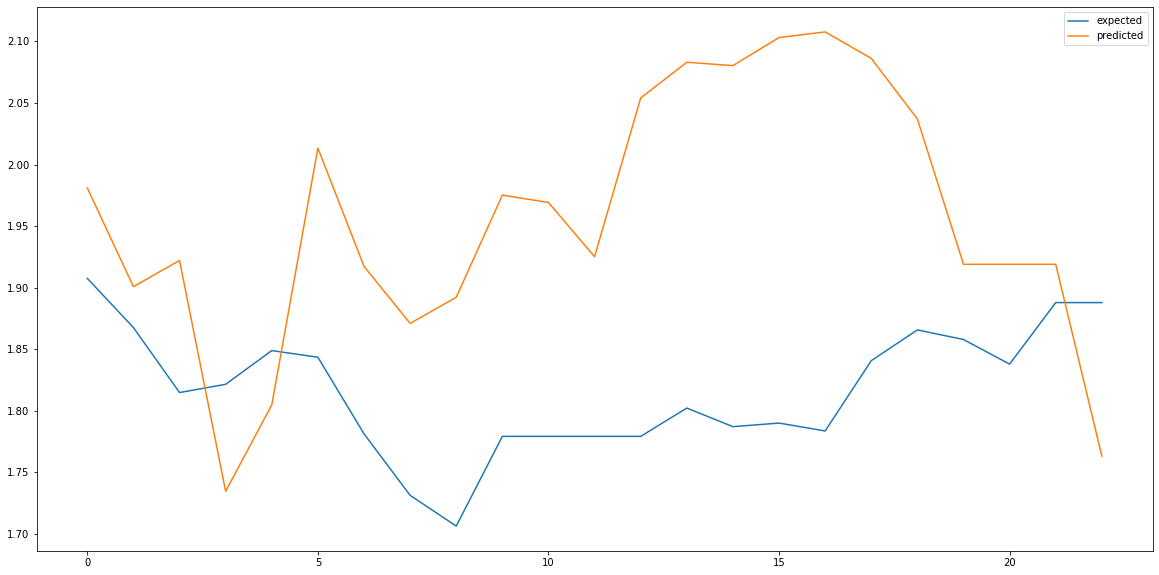

In [137]:
fig, ax = plt.subplots(1, figsize = (20,10))
x_axis = list(range(23))
line1, = ax.plot(x_axis, expected_y)
line2, = ax.plot(x_axis, predicted_y)
    
line1.set_label('expected')
line2.set_label('predicted')

ax.legend()
plt.show()

## Initial model and dataframe result for the first column "treasury_bond_rate_1m"

In [138]:
merged = pd.read_csv('merged_new_with_date.csv', index_col = 'date', na_filter = False)
merged = merged.drop(columns=['year','month','day','weekday'])

In [139]:
marketm = merged.iloc[:,0:22]
predictionm = merged.iloc[:,22:47]

In [140]:
# fill empty cell with the last value
for i in range(0, len(marketm)):
    for j in range(0,22):
        if marketm.iloc[i,j] == '':
            if i == 0:
                continue
            marketm.iloc[i,j] = marketm.iloc[i-1,j]

for i in range(0, len(predictionm)):
    for j in range(0,24):
        if predictionm.iloc[i,j] == '':
            if i == 0:
                continue
            predictionm.iloc[i,j] = predictionm.iloc[i-1,j]


# delete the date which is not the same
a = []
for i in range(0, len(marketm.index)):
    if marketm.index[i] not in predictionm.index:
        a.append(marketm.index[i])
marketm = marketm.drop(a)

b = []
for i in range(0, len(predictionm.index)):
    if predictionm.index[i] not in marketm.index:
        b.append(predictionm.index[i])
predictionm = predictionm.drop(b)

marketm.index == predictionm.index

array([ True,  True,  True, ...,  True,  True,  True])

In [141]:
# drop data before 2014
marketm = marketm.iloc[4287:,:]
predictionm = predictionm.iloc[4287:,:]

In [142]:
marketm

,iva_year,retail_sales_year,fixedinvestment_used,cpi,cpi_food,ppi,ppirm,energy_price_index,non-manufacturing_pmi,m2_ratio,...,investment_real_estate_ratio,new_area_ratio,working_area_ratio,finish_area_ratio,saled_area_ratio,saled_amount_ratio,oil_dtd_spot,luowen_steel_future,gold_comex_future,csi300_index
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,5.7,9.60,12.02,1.8,4.1,-5.3,-6.3,48.81,47.4,14.0,...,1.0,-14.0,1.3,-6.9,6.5,14.4,35.74,1792.0,1060.2,3731.0
2016-01-04,5.7,9.60,12.02,1.8,4.1,-5.3,-6.3,48.81,47.4,14.0,...,1.0,-14.0,1.3,-6.9,6.5,14.4,36.53,1797.0,1075.2,3469.07
2016-01-05,5.7,9.60,12.02,1.8,4.1,-5.3,-6.3,48.81,47.4,14.0,...,1.0,-14.0,1.3,-6.9,6.5,14.4,35.53,1778.0,1078.4,3478.78
2016-01-06,5.7,9.60,12.02,1.8,4.1,-5.3,-6.3,48.81,47.4,14.0,...,1.0,-14.0,1.3,-6.9,6.5,14.4,33.82,1773.0,1091.9,3539.81
2016-01-07,5.7,9.60,12.02,1.8,4.1,-5.3,-6.3,48.81,47.4,14.0,...,1.0,-14.0,1.3,-6.9,6.5,14.4,33.7,1775.0,1107.8,3294.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-25,2.4,-5.23,2.73,0.4,-0.7,4.4,5.2,130.62,51.7,9.4,...,25.6,28.2,11.2,22.9,63.8,88.5,65.79,5260.0,1777.8,5135.45
2021-04-26,2.4,-5.23,2.73,0.4,-0.7,4.4,5.2,130.62,51.7,9.4,...,25.6,28.2,11.2,22.9,63.8,88.5,65.58,5402.0,1780.1,5077.24
2021-04-27,2.4,-5.23,2.73,0.4,-0.7,4.4,5.2,130.62,51.7,9.4,...,25.6,28.2,11.2,22.9,63.8,88.5,65.72,5404.0,1778.8,5090.52


In [143]:
predictionm

,treasury_bond_rate_1m,treasury_bond_rate_3m,treasury_bond_rate_6m,treasury_bond_rate_1y,treasury_bond_rate_3y,treasury_bond_rate_10y,cdb_rate_6m,cdb_rate_1y,cdb_rate_3y,cdb_rate_10y,...,cdi_rate_6m,cdi_rate_1y,cdi_rate_3y,cdi_rate_10y,com_rate_1m,com_rate_3m,com_rate_6m,com_rate_1y,com_rate_3y,com_rate_10y
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,2.2017,2.2507,2.2581,2.2979,2.5466,2.8212,2.3479,2.3982,2.642,3.1322,...,2.8515,2.9704,3.1743,3.919,2.7295,2.7298,2.7599,2.8658,3.0397,3.8212
2016-01-04,2.2663,2.3002,2.3166,2.3479,2.5697,2.871,2.4203,2.4581,2.7405,3.1775,...,2.9032,2.9852,3.1771,3.9234,2.6976,2.7651,2.8116,2.8906,3.0735,3.8256
2016-01-05,2.2816,2.3,2.307,2.368,2.6173,2.8911,2.5056,2.5182,2.795,3.2175,...,2.957,2.9938,3.1713,3.9142,2.6976,2.767,2.8754,2.9192,3.0877,3.8164
2016-01-06,2.3264,2.3296,2.3299,2.369,2.6322,2.8861,2.4609,2.5396,2.7783,3.1826,...,2.8975,3.0189,3.1895,3.904,2.6966,2.7316,2.8159,2.9444,3.1159,3.8062
2016-01-07,2.2918,2.3473,2.3412,2.37,2.611,2.8511,2.4613,2.506,2.7521,3.1426,...,2.8431,2.9903,3.1818,3.8923,2.691,2.7284,2.7615,2.9058,3.0882,3.7945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-25,1.7585,2.0422,2.0935,2.3858,2.7483,3.1841,2.2314,2.5207,3.1063,3.5579,...,2.8063,2.9889,3.4548,4.2839,2.4672,2.7147,2.7947,2.9414,3.4356,4.0004
2021-04-26,1.7436,1.9997,2.0979,2.4313,2.793,3.2024,2.2198,2.5627,3.1526,3.5779,...,2.8133,2.9758,3.4851,4.2639,2.4826,2.7181,2.7986,2.9495,3.4288,4.0042
2021-04-27,1.713,1.9729,2.0907,2.4226,2.7935,3.2078,2.1738,2.5325,3.1727,3.5905,...,2.8128,2.9872,3.5052,4.2547,2.4338,2.7181,2.8048,2.9442,3.4491,4.0242


In [144]:
def split_sequence(sequence1, sequence2, n_steps_in, n_steps_out, column):
    X, y = list(), list()
    for i in range(len(sequence1)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence1):
            break
        # gather input and output parts of the pattern
        seq_x = sequence1[i:end_ix].to_numpy().flatten()
        seq_y = sequence2.iloc[end_ix:out_end_ix, column].to_numpy()[n_steps_out-1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

train_x, train_y = split_sequence(marketm, predictionm, 1, 1, 0)
test_x = marketm.tail(22).to_numpy()

In [145]:
model = lgb.LGBMRegressor()
model.fit(train_x, train_y)

LGBMRegressor()

In [146]:
predicted_y = model.predict(test_x)

In [147]:
predicted_y

array([1.81090484, 1.79954054, 1.77965352, 1.75153872, 1.75404717,
       1.7489784 , 1.75255105, 1.77671047, 1.74444242, 1.75492293,
       1.75401971, 1.74996458, 1.75506701, 1.76217236, 1.74255521,
       1.75822525, 1.75043117, 1.75043117, 1.74650232, 1.74255521,
       1.71954786, 1.71954786])

In [148]:
# fig, ax = plt.subplots(1, figsize = (20,10))
# x_axis = list(range(23))

# line1, = ax.plot(x_axis, predicted_y)

# line1.set_label('predicted')
# ax.legend()
# plt.show()

In [149]:
results = pd.DataFrame(predicted_y)
results

,0
0,1.810905
1,1.799541
2,1.779654
3,1.751539
4,1.754047
5,1.748978
6,1.752551
7,1.776710
8,1.744442
9,1.754923


## Use loop to finish the last 22 columns prediction

In [150]:
for i in tqdm(range(1,24)):
    train_x, train_y = split_sequence(marketm, predictionm, 1, 1, i)
    test_x = marketm.tail(22).to_numpy()
    model = lgb.LGBMRegressor()
    model.fit(train_x, train_y)
    predicted_y = model.predict(test_x)
    results = pd.concat([results, pd.DataFrame(predicted_y)], axis=1)


LGBMRegressor()

LGBMRegressor()

LGBMRegressor()

LGBMRegressor()

LGBMRegressor()

LGBMRegressor()

LGBMRegressor()

LGBMRegressor()

LGBMRegressor()

LGBMRegressor()

LGBMRegressor()

LGBMRegressor()

LGBMRegressor()

LGBMRegressor()

LGBMRegressor()

LGBMRegressor()

LGBMRegressor()

LGBMRegressor()

LGBMRegressor()

LGBMRegressor()

LGBMRegressor()

LGBMRegressor()

LGBMRegressor()

In [151]:
results

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1.810905,1.966421,2.249071,2.619477,2.900956,3.211173,2.423180,2.773627,3.201242,3.602391,...,2.884610,3.108484,3.649034,4.234172,2.458921,2.754239,2.903723,3.025736,3.559064,4.077458
1,1.799541,1.968152,2.201606,2.576945,2.872042,3.205395,2.378734,2.754606,3.191924,3.582965,...,2.834861,3.069368,3.600879,4.232316,2.451407,2.766905,2.862987,3.002080,3.518743,4.055406
2,1.779654,1.968152,2.201606,2.578517,2.872042,3.205395,2.378734,2.755519,3.191924,3.579443,...,2.834861,3.069368,3.600879,4.232316,2.451407,2.760707,2.859859,3.002080,3.517264,4.055406
3,1.751539,1.957470,2.197733,2.563149,2.852241,3.204423,2.348371,2.709630,3.180317,3.579681,...,2.823007,3.061225,3.591870,4.256080,2.437139,2.732864,2.846285,2.995829,3.508562,4.050093
4,1.754047,1.953630,2.200248,2.563140,2.852241,3.200628,2.362561,2.712891,3.180317,3.572395,...,2.811650,3.054298,3.594128,4.241275,2.435301,2.735758,2.839813,2.995644,3.510839,4.049230
5,1.748978,1.950462,2.172931,2.556927,2.838777,3.195185,2.326534,2.704428,3.166653,3.562050,...,2.808414,3.041307,3.580744,4.254364,2.437139,2.739348,2.841947,2.994128,3.498816,4.039030
6,1.752551,2.010517,2.240486,2.572201,2.847985,3.188580,2.369308,2.722953,3.176689,3.547083,...,2.820568,3.061356,3.574582,4.248681,2.482714,2.720423,2.836943,2.994840,3.499653,4.047609
7,1.776710,2.021390,2.251917,2.598633,2.866227,3.191047,2.404987,2.748211,3.172999,3.560598,...,2.877735,3.097958,3.609510,4.240971,2.504495,2.708646,2.871769,3.020974,3.544883,4.074278
8,1.744442,2.017563,2.182237,2.552153,2.819676,3.174092,2.318098,2.699775,3.148545,3.535321,...,2.816676,3.034687,3.553819,4.258878,2.492502,2.698700,2.819705,2.989366,3.489048,4.046592
9,1.754923,2.064582,2.186445,2.532375,2.837388,3.177829,2.299817,2.644122,3.159515,3.553701,...,2.823583,3.043359,3.539077,4.264864,2.528281,2.702399,2.800692,2.986537,3.480625,4.041553


In [152]:
column_names = []
for i in range(0,24):
    column_names.append(predictionm.iloc[:,i].name)

In [153]:
column_names

['treasury_bond_rate_1m',
 'treasury_bond_rate_3m',
 'treasury_bond_rate_6m',
 'treasury_bond_rate_1y',
 'treasury_bond_rate_3y',
 'treasury_bond_rate_10y',
 'cdb_rate_6m',
 'cdb_rate_1y',
 'cdb_rate_3y',
 'cdb_rate_10y',
 'loc_rate_6m',
 'loc_rate_1y',
 'loc_rate_3y',
 'loc_rate_10y',
 'cdi_rate_6m',
 'cdi_rate_1y',
 'cdi_rate_3y',
 'cdi_rate_10y',
 'com_rate_1m',
 'com_rate_3m',
 'com_rate_6m',
 'com_rate_1y',
 'com_rate_3y',
 'com_rate_10y']

In [154]:
results.columns = column_names
results

,treasury_bond_rate_1m,treasury_bond_rate_3m,treasury_bond_rate_6m,treasury_bond_rate_1y,treasury_bond_rate_3y,treasury_bond_rate_10y,cdb_rate_6m,cdb_rate_1y,cdb_rate_3y,cdb_rate_10y,...,cdi_rate_6m,cdi_rate_1y,cdi_rate_3y,cdi_rate_10y,com_rate_1m,com_rate_3m,com_rate_6m,com_rate_1y,com_rate_3y,com_rate_10y
0,1.810905,1.966421,2.249071,2.619477,2.900956,3.211173,2.423180,2.773627,3.201242,3.602391,...,2.884610,3.108484,3.649034,4.234172,2.458921,2.754239,2.903723,3.025736,3.559064,4.077458
1,1.799541,1.968152,2.201606,2.576945,2.872042,3.205395,2.378734,2.754606,3.191924,3.582965,...,2.834861,3.069368,3.600879,4.232316,2.451407,2.766905,2.862987,3.002080,3.518743,4.055406
2,1.779654,1.968152,2.201606,2.578517,2.872042,3.205395,2.378734,2.755519,3.191924,3.579443,...,2.834861,3.069368,3.600879,4.232316,2.451407,2.760707,2.859859,3.002080,3.517264,4.055406
3,1.751539,1.957470,2.197733,2.563149,2.852241,3.204423,2.348371,2.709630,3.180317,3.579681,...,2.823007,3.061225,3.591870,4.256080,2.437139,2.732864,2.846285,2.995829,3.508562,4.050093
4,1.754047,1.953630,2.200248,2.563140,2.852241,3.200628,2.362561,2.712891,3.180317,3.572395,...,2.811650,3.054298,3.594128,4.241275,2.435301,2.735758,2.839813,2.995644,3.510839,4.049230
5,1.748978,1.950462,2.172931,2.556927,2.838777,3.195185,2.326534,2.704428,3.166653,3.562050,...,2.808414,3.041307,3.580744,4.254364,2.437139,2.739348,2.841947,2.994128,3.498816,4.039030
6,1.752551,2.010517,2.240486,2.572201,2.847985,3.188580,2.369308,2.722953,3.176689,3.547083,...,2.820568,3.061356,3.574582,4.248681,2.482714,2.720423,2.836943,2.994840,3.499653,4.047609
7,1.776710,2.021390,2.251917,2.598633,2.866227,3.191047,2.404987,2.748211,3.172999,3.560598,...,2.877735,3.097958,3.609510,4.240971,2.504495,2.708646,2.871769,3.020974,3.544883,4.074278
8,1.744442,2.017563,2.182237,2.552153,2.819676,3.174092,2.318098,2.699775,3.148545,3.535321,...,2.816676,3.034687,3.553819,4.258878,2.492502,2.698700,2.819705,2.989366,3.489048,4.046592
9,1.754923,2.064582,2.186445,2.532375,2.837388,3.177829,2.299817,2.644122,3.159515,3.553701,...,2.823583,3.043359,3.539077,4.264864,2.528281,2.702399,2.800692,2.986537,3.480625,4.041553


In [155]:
index_names = pd.date_range(start='5/6/2021', end='6/4/2021', freq='B')
index_names

DatetimeIndex(['2021-05-06', '2021-05-07', '2021-05-10', '2021-05-11',
               '2021-05-12', '2021-05-13', '2021-05-14', '2021-05-17',
               '2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
               '2021-05-24', '2021-05-25', '2021-05-26', '2021-05-27',
               '2021-05-28', '2021-05-31', '2021-06-01', '2021-06-02',
               '2021-06-03', '2021-06-04'],
              dtype='datetime64[ns]', freq='B')

In [156]:
results.index = index_names
results

,treasury_bond_rate_1m,treasury_bond_rate_3m,treasury_bond_rate_6m,treasury_bond_rate_1y,treasury_bond_rate_3y,treasury_bond_rate_10y,cdb_rate_6m,cdb_rate_1y,cdb_rate_3y,cdb_rate_10y,...,cdi_rate_6m,cdi_rate_1y,cdi_rate_3y,cdi_rate_10y,com_rate_1m,com_rate_3m,com_rate_6m,com_rate_1y,com_rate_3y,com_rate_10y
2021-05-06,1.810905,1.966421,2.249071,2.619477,2.900956,3.211173,2.423180,2.773627,3.201242,3.602391,...,2.884610,3.108484,3.649034,4.234172,2.458921,2.754239,2.903723,3.025736,3.559064,4.077458
2021-05-07,1.799541,1.968152,2.201606,2.576945,2.872042,3.205395,2.378734,2.754606,3.191924,3.582965,...,2.834861,3.069368,3.600879,4.232316,2.451407,2.766905,2.862987,3.002080,3.518743,4.055406
2021-05-10,1.779654,1.968152,2.201606,2.578517,2.872042,3.205395,2.378734,2.755519,3.191924,3.579443,...,2.834861,3.069368,3.600879,4.232316,2.451407,2.760707,2.859859,3.002080,3.517264,4.055406
2021-05-11,1.751539,1.957470,2.197733,2.563149,2.852241,3.204423,2.348371,2.709630,3.180317,3.579681,...,2.823007,3.061225,3.591870,4.256080,2.437139,2.732864,2.846285,2.995829,3.508562,4.050093
2021-05-12,1.754047,1.953630,2.200248,2.563140,2.852241,3.200628,2.362561,2.712891,3.180317,3.572395,...,2.811650,3.054298,3.594128,4.241275,2.435301,2.735758,2.839813,2.995644,3.510839,4.049230
2021-05-13,1.748978,1.950462,2.172931,2.556927,2.838777,3.195185,2.326534,2.704428,3.166653,3.562050,...,2.808414,3.041307,3.580744,4.254364,2.437139,2.739348,2.841947,2.994128,3.498816,4.039030
2021-05-14,1.752551,2.010517,2.240486,2.572201,2.847985,3.188580,2.369308,2.722953,3.176689,3.547083,...,2.820568,3.061356,3.574582,4.248681,2.482714,2.720423,2.836943,2.994840,3.499653,4.047609
2021-05-17,1.776710,2.021390,2.251917,2.598633,2.866227,3.191047,2.404987,2.748211,3.172999,3.560598,...,2.877735,3.097958,3.609510,4.240971,2.504495,2.708646,2.871769,3.020974,3.544883,4.074278
2021-05-18,1.744442,2.017563,2.182237,2.552153,2.819676,3.174092,2.318098,2.699775,3.148545,3.535321,...,2.816676,3.034687,3.553819,4.258878,2.492502,2.698700,2.819705,2.989366,3.489048,4.046592
2021-05-19,1.754923,2.064582,2.186445,2.532375,2.837388,3.177829,2.299817,2.644122,3.159515,3.553701,...,2.823583,3.043359,3.539077,4.264864,2.528281,2.702399,2.800692,2.986537,3.480625,4.041553


In [157]:
results = results.reset_index()

In [158]:
results = results.rename(columns={'index':'biz_date'})

In [159]:
results

,biz_date,treasury_bond_rate_1m,treasury_bond_rate_3m,treasury_bond_rate_6m,treasury_bond_rate_1y,treasury_bond_rate_3y,treasury_bond_rate_10y,cdb_rate_6m,cdb_rate_1y,cdb_rate_3y,...,cdi_rate_6m,cdi_rate_1y,cdi_rate_3y,cdi_rate_10y,com_rate_1m,com_rate_3m,com_rate_6m,com_rate_1y,com_rate_3y,com_rate_10y
0,2021-05-06,1.810905,1.966421,2.249071,2.619477,2.900956,3.211173,2.423180,2.773627,3.201242,...,2.884610,3.108484,3.649034,4.234172,2.458921,2.754239,2.903723,3.025736,3.559064,4.077458
1,2021-05-07,1.799541,1.968152,2.201606,2.576945,2.872042,3.205395,2.378734,2.754606,3.191924,...,2.834861,3.069368,3.600879,4.232316,2.451407,2.766905,2.862987,3.002080,3.518743,4.055406
2,2021-05-10,1.779654,1.968152,2.201606,2.578517,2.872042,3.205395,2.378734,2.755519,3.191924,...,2.834861,3.069368,3.600879,4.232316,2.451407,2.760707,2.859859,3.002080,3.517264,4.055406
3,2021-05-11,1.751539,1.957470,2.197733,2.563149,2.852241,3.204423,2.348371,2.709630,3.180317,...,2.823007,3.061225,3.591870,4.256080,2.437139,2.732864,2.846285,2.995829,3.508562,4.050093
4,2021-05-12,1.754047,1.953630,2.200248,2.563140,2.852241,3.200628,2.362561,2.712891,3.180317,...,2.811650,3.054298,3.594128,4.241275,2.435301,2.735758,2.839813,2.995644,3.510839,4.049230
5,2021-05-13,1.748978,1.950462,2.172931,2.556927,2.838777,3.195185,2.326534,2.704428,3.166653,...,2.808414,3.041307,3.580744,4.254364,2.437139,2.739348,2.841947,2.994128,3.498816,4.039030
6,2021-05-14,1.752551,2.010517,2.240486,2.572201,2.847985,3.188580,2.369308,2.722953,3.176689,...,2.820568,3.061356,3.574582,4.248681,2.482714,2.720423,2.836943,2.994840,3.499653,4.047609
7,2021-05-17,1.776710,2.021390,2.251917,2.598633,2.866227,3.191047,2.404987,2.748211,3.172999,...,2.877735,3.097958,3.609510,4.240971,2.504495,2.708646,2.871769,3.020974,3.544883,4.074278
8,2021-05-18,1.744442,2.017563,2.182237,2.552153,2.819676,3.174092,2.318098,2.699775,3.148545,...,2.816676,3.034687,3.553819,4.258878,2.492502,2.698700,2.819705,2.989366,3.489048,4.046592
9,2021-05-19,1.754923,2.064582,2.186445,2.532375,2.837388,3.177829,2.299817,2.644122,3.159515,...,2.823583,3.043359,3.539077,4.264864,2.528281,2.702399,2.800692,2.986537,3.480625,4.041553


In [160]:
results.to_csv('results/prediction.csv',sep=',', index=False)